##### 그룹 데이터 생성

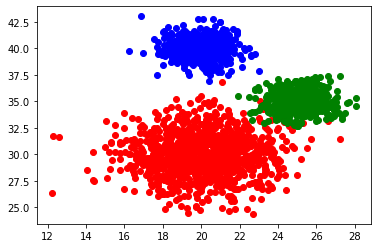

In [67]:
import matplotlib.pyplot as plt
import numpy as np

g_1_centroid = np.array([20, 30])
group_1 = np.random.randn(1000, 2) * 2 + g_1_centroid[None, :]

g_2_centroid = np.array([25, 35])
group_2 = np.random.randn(500, 2) * 1 + g_2_centroid[None, :]

g_3_centroid = np.array([20, 40])
group_3 = np.random.randn(500, 2) * 1 + g_3_centroid[None, :]


# plt.plot(group_1[:,0], group_1[:,1], marker='o', color='#%02x%02x%02x' % (255, 0, 0))
# plt.plot(group_2[:,0], group_2[:,1], marker='o', color='#%02x%02x%02x' % (0, 255, 0))
# plt.plot(group_3[:,0], group_3[:,1], marker='o', color='#%02x%02x%02x' % (0, 0, 255))
plt.plot(group_1[:,0], group_1[:,1], 'ro')
plt.plot(group_2[:,0], group_2[:,1], 'go')
plt.plot(group_3[:,0], group_3[:,1], 'bo')
plt.show()

##### K mean Algorithm

In [59]:
import numpy as np

def get_centroids(all_dot, num=3, epoch=10):
    all_dot = np.array(all_dot) # (2000, 2)
    np.random.shuffle(all_dot)
    next_centroids = all_dot[:num] # (num,2)
    for _ in range(epoch):
        dist_all_to_cent = np.linalg.norm(all_dot[:,None,:] - next_centroids[None,...], axis=-1) # (2000, num)
        min_idxs = np.argmin(dist_all_to_cent, axis=-1) # (2000,)
        unique, counts = np.unique(min_idxs, return_counts=True) # (3,), (3,) # unique is auto sorted
        seleted = np.stack([np.where(min_idxs[:,None]==i, all_dot, 0) for i in range(num)]) # (3, 2000,2) # many zeros
        tot_each = np.sum(seleted, axis=1) # (3,2)
        next_centroids = tot_each / counts[:,None] # (3,2)
    return next_centroids

def split_all_dot(all_dot, centroids):
    dist_all_to_cent = np.linalg.norm(all_dot[:,None,:] - centroids[None,...], axis=-1) # (2000, num)
    min_idxs = np.argmin(dist_all_to_cent, axis=-1) # (2000,)
    return [all_dot[np.where(min_idxs==i)] for i in range(len(centroids))]

##### 실행

In [69]:
import numpy as np

all_dot = np.concatenate([group_1, group_2, group_3], axis=0)
centroids = get_centroids(all_dot, num=3, epoch=10)
split_dots = split_all_dot(all_dot, centroids)

##### 확인하기

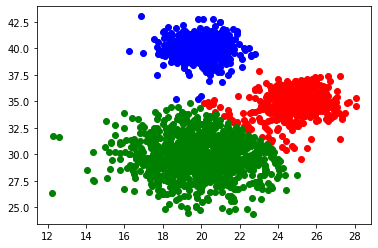

In [70]:
import matplotlib.pyplot as plt

c = ['r', 'g', 'b']
for i, dots in enumerate(split_dots):
    plt.plot(dots[:,0], dots[:,1], f'{c[i]}o', )
plt.show()